## HW0 -- Setting up Nilearn and Plotting. This assignment will serve as a general tutorial to neuroimaging data and the Nilearn package

This first assignment will serve as a brief introduction to the nilearn Python library (https://nilearn.github.io/dev/index.html). In this assigment, you will see how to import data with nilearn, generate images of brain data, and develop some familiarity with nilearn syntax. To complete this assignment, make sure that you have nilearn, pandas, and numpy installed and that you can import these packages into a Jupyter Notebook environment. For Parts 0-2, all you have to do is run the cells below. For Part 3, you will have to add your own calls to nilearn.  

In [1]:
### Some initial imports

import warnings
warnings.filterwarnings("ignore")
from pprint import pprint

## Part 0: Getting Set Up and Importing Packages

If you don't have them installed already, please install nilearn, pandas, matplotlib, and numpy on your system. Then create a new cell below this and import these three packages.

In [2]:
### Add your import statements here

import nilearn


## Part 1: Importing Data with Nilearn

Nilearn is a pretty large Python library and has a lot of moving parts. To keep things a little simpler, we will only import the bits of code that we need, instead of the entire library. Running this cell will import the MNI152 template brain. This template is the average of structural MRI images (T1 weighted) in 152 participants and is comonly used as a standard coordinate space for data analysis

In [3]:
# import the MNI152 dataset that comes with nilearn
from nilearn.datasets import MNI152_FILE_PATH


Nilearn is a great way to dive into neuroimaging data without actually having to go to an MRI scan center because it comes pre-loaded with access to a variety of different datasets that let you practice different analyses with nicely organized fMRI data. These various datasets (and other pre-loaded resources) can be found here: https://nilearn.github.io/stable/modules/datasets.html

To download a preprocessed dataset, look for the section titled **Preprocessed datasets**. 

**Note:** MRI data can take up *A LOT* of space on your computers hard drive. Some of these datasets have the parameter `n_subjects` in the function call. If you see this option, I highly recommend setting this value to 1 (meaning it will only download 1 subject) for this homework. If you don't see `n_subjects` in the function parameters, it should by default only download a single subject.

In the cell below we are downloading one participants data in the Nilearn ADHD dataset. 

In [4]:
# use the fetch_adhd function with parameter n_subjects=1 to download one subject from this dataset

adhd_study_sub = nilearn.datasets.fetch_adhd(n_subjects=1)


Added README.md to /Users/jamiel12/nilearn_data


Dataset created in /Users/jamiel12/nilearn_data/adhd



 ...done. (0 seconds, 0 min)
Extracting data from /Users/jamiel12/nilearn_data/adhd/fbef5baff0b388a8c913a08e1d84e059/adhd40_metadata.tgz..... done.


Downloaded 38182912 of 44414948 bytes (86.0%,    0.7s remaining) ...done. (5 seconds, 0 min)
Extracting data from /Users/jamiel12/nilearn_data/adhd/e7ff5670bd594dcd9453e57b55d69dc9/adhd40_0010042.tgz..... done.


## Part 2: Plotting Brain Images

### Plotting the MNI152 Brain

For our first plot, we will look at the MNI152 template brain. To create a plot, we can use the `plotting.plot_img()` function. This function just needs you to provide the path (the location of a file on your computer) of an MRI file. However, there are other keywords you can add to change the appearance of your plot. These options can be found here: https://nilearn.github.io/stable/modules/generated/nilearn.plotting.plot_img.html#nilearn.plotting.plot_img

Let's make a simple figure showing the MNI template

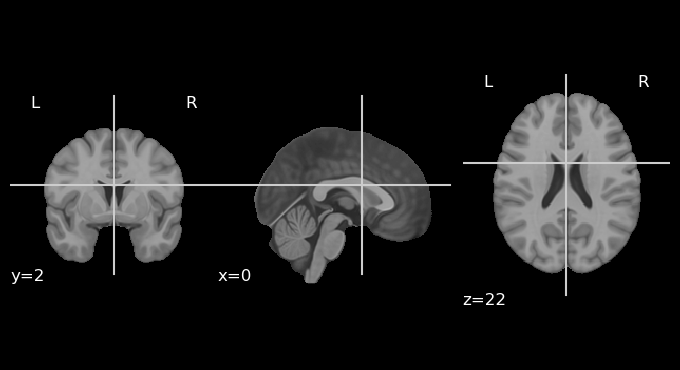

In [5]:
# import the special plotting functions 
from nilearn import plotting

# The MNI152_FILE_PATH automatically comes with nilearn
# If you're curious, try running the command print(MNI152_FILE_PATH)
# in another cell to see what an example path looks like
plotting.plot_anat(MNI152_FILE_PATH)


### Plotting the ADHD dataset

If you're curious about another dataset you just downloaded from nilearn you can look at it by editing and running the cell below.

In [6]:
### Update this cell with your data

pprint(adhd_study_sub)

{'confounds': ['/Users/jamiel12/nilearn_data/adhd/data/0010042/0010042_regressors.csv'],
 'description': 'ADHD 200\n'
                '\n'
                '\n'
                'Notes\n'
                '-----\n'
                'Part of the 1000 Functional Connectome Project. Phenotypic\n'
                'information includes: diagnostic status, dimensional ADHD '
                'symptom measures,\n'
                'age, sex, intelligence quotient (IQ) and lifetime medication '
                'status.\n'
                'Preliminary quality control assessments (usable vs. '
                'questionable) based upon\n'
                'visual timeseries inspection are included for all resting '
                'state fMRI scans.\n'
                '\n'
                'Includes preprocessed data from 40 participants.\n'
                '\n'
                'Project was coordinated by Michael P. Milham.\n'
                '\n'
                'Content\n'
                '-------\n'
 

That's a lot of information...Turns out that the pre-loaded Nilearn datasets are stored as dictionaries. You should look for the key that has the file extension `.nii.gz` (known as a NIFTI file). This entry should be associated with the key `'func'` but may look slightly different depending on what dataset you have chosen but as long as the value associated with the key has the `.nii.gz` extension you should be good to go. When loading these files, you have to call the function `nilearn.image.load_img(your_image_file)`

So now lets look at the entry holding our NIFTI file. The MNI152 brain above is an average image of 152 structural images. However, these other datasets consist of a series of functional images captured over the duration of the experiment. The scanner captures an image every couple of seconds. You can check the dimensions images your single subjects data by calling the `shape` method on your subject's loaded functional data (`.func`) in the cell below. The first three numbers are the x, y, and z dimensions (since an MRI scan is a 3D image) and the 4th number is the total number of images collected (the time dimension).



In [7]:
### Output your data's shape here

nilearn.image.load_img(adhd_study_sub.func).shape

(61, 73, 61, 176)

fMRI data has 4 dimensions: X, Y, Z and time. We have a couple options for visualizing the brains of our study participants. The first option is to plot the 3d image of each timepoint one by one. This can be accomplished using the function `nilearn.image.index_img()`, where you provide the function a participant and the timepoint number of the image you want to look at. In the following cell, visualize the 10th image your chosen data by wrapping the `nilearn.image.index_img()` function inside the `plotting.plot_anat()` function.

**Note:** you can use any of the plotting functions as a wrapper here, I'm just chosing `plotting.plot_anat()` arbitrarily.  

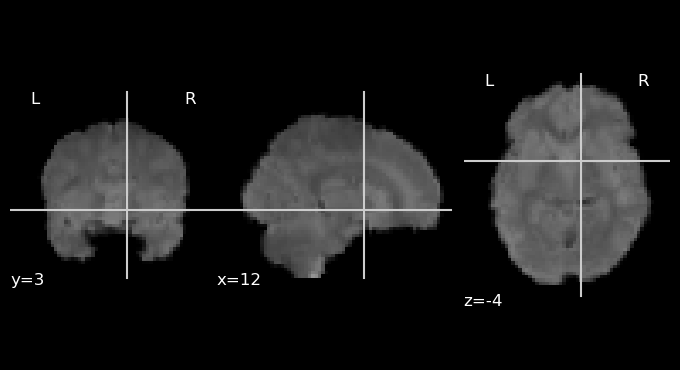

In [8]:
### Plot the 10th slice here

plotting.plot_anat(nilearn.image.index_img(adhd_study_sub.func[0],10))


The other option we can use to visualize an individual participants data is to use the `mean_img()` function, which takes all the timepoints and compiles them into a single average image. In the cell below, plot the mean image of your participants functional data using the `mean_img()` command. 

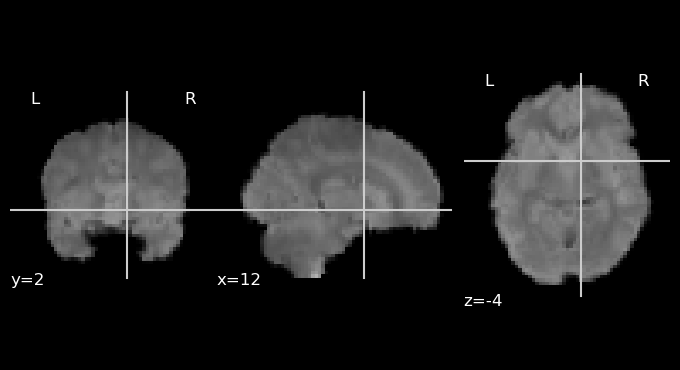

In [9]:
# Helper method for avveraging a 4-D image
from nilearn.image import mean_img

plotting.plot_anat(mean_img(adhd_study_sub.func[0]))

In addition to setting specific plotting options ourselves, we can also pass the keyword *mosaic* into the `display_mode` parameter to get an image with many different views of a participant's brain.

Try generating this plot with the mean image for the participant you downloaded earlier. 

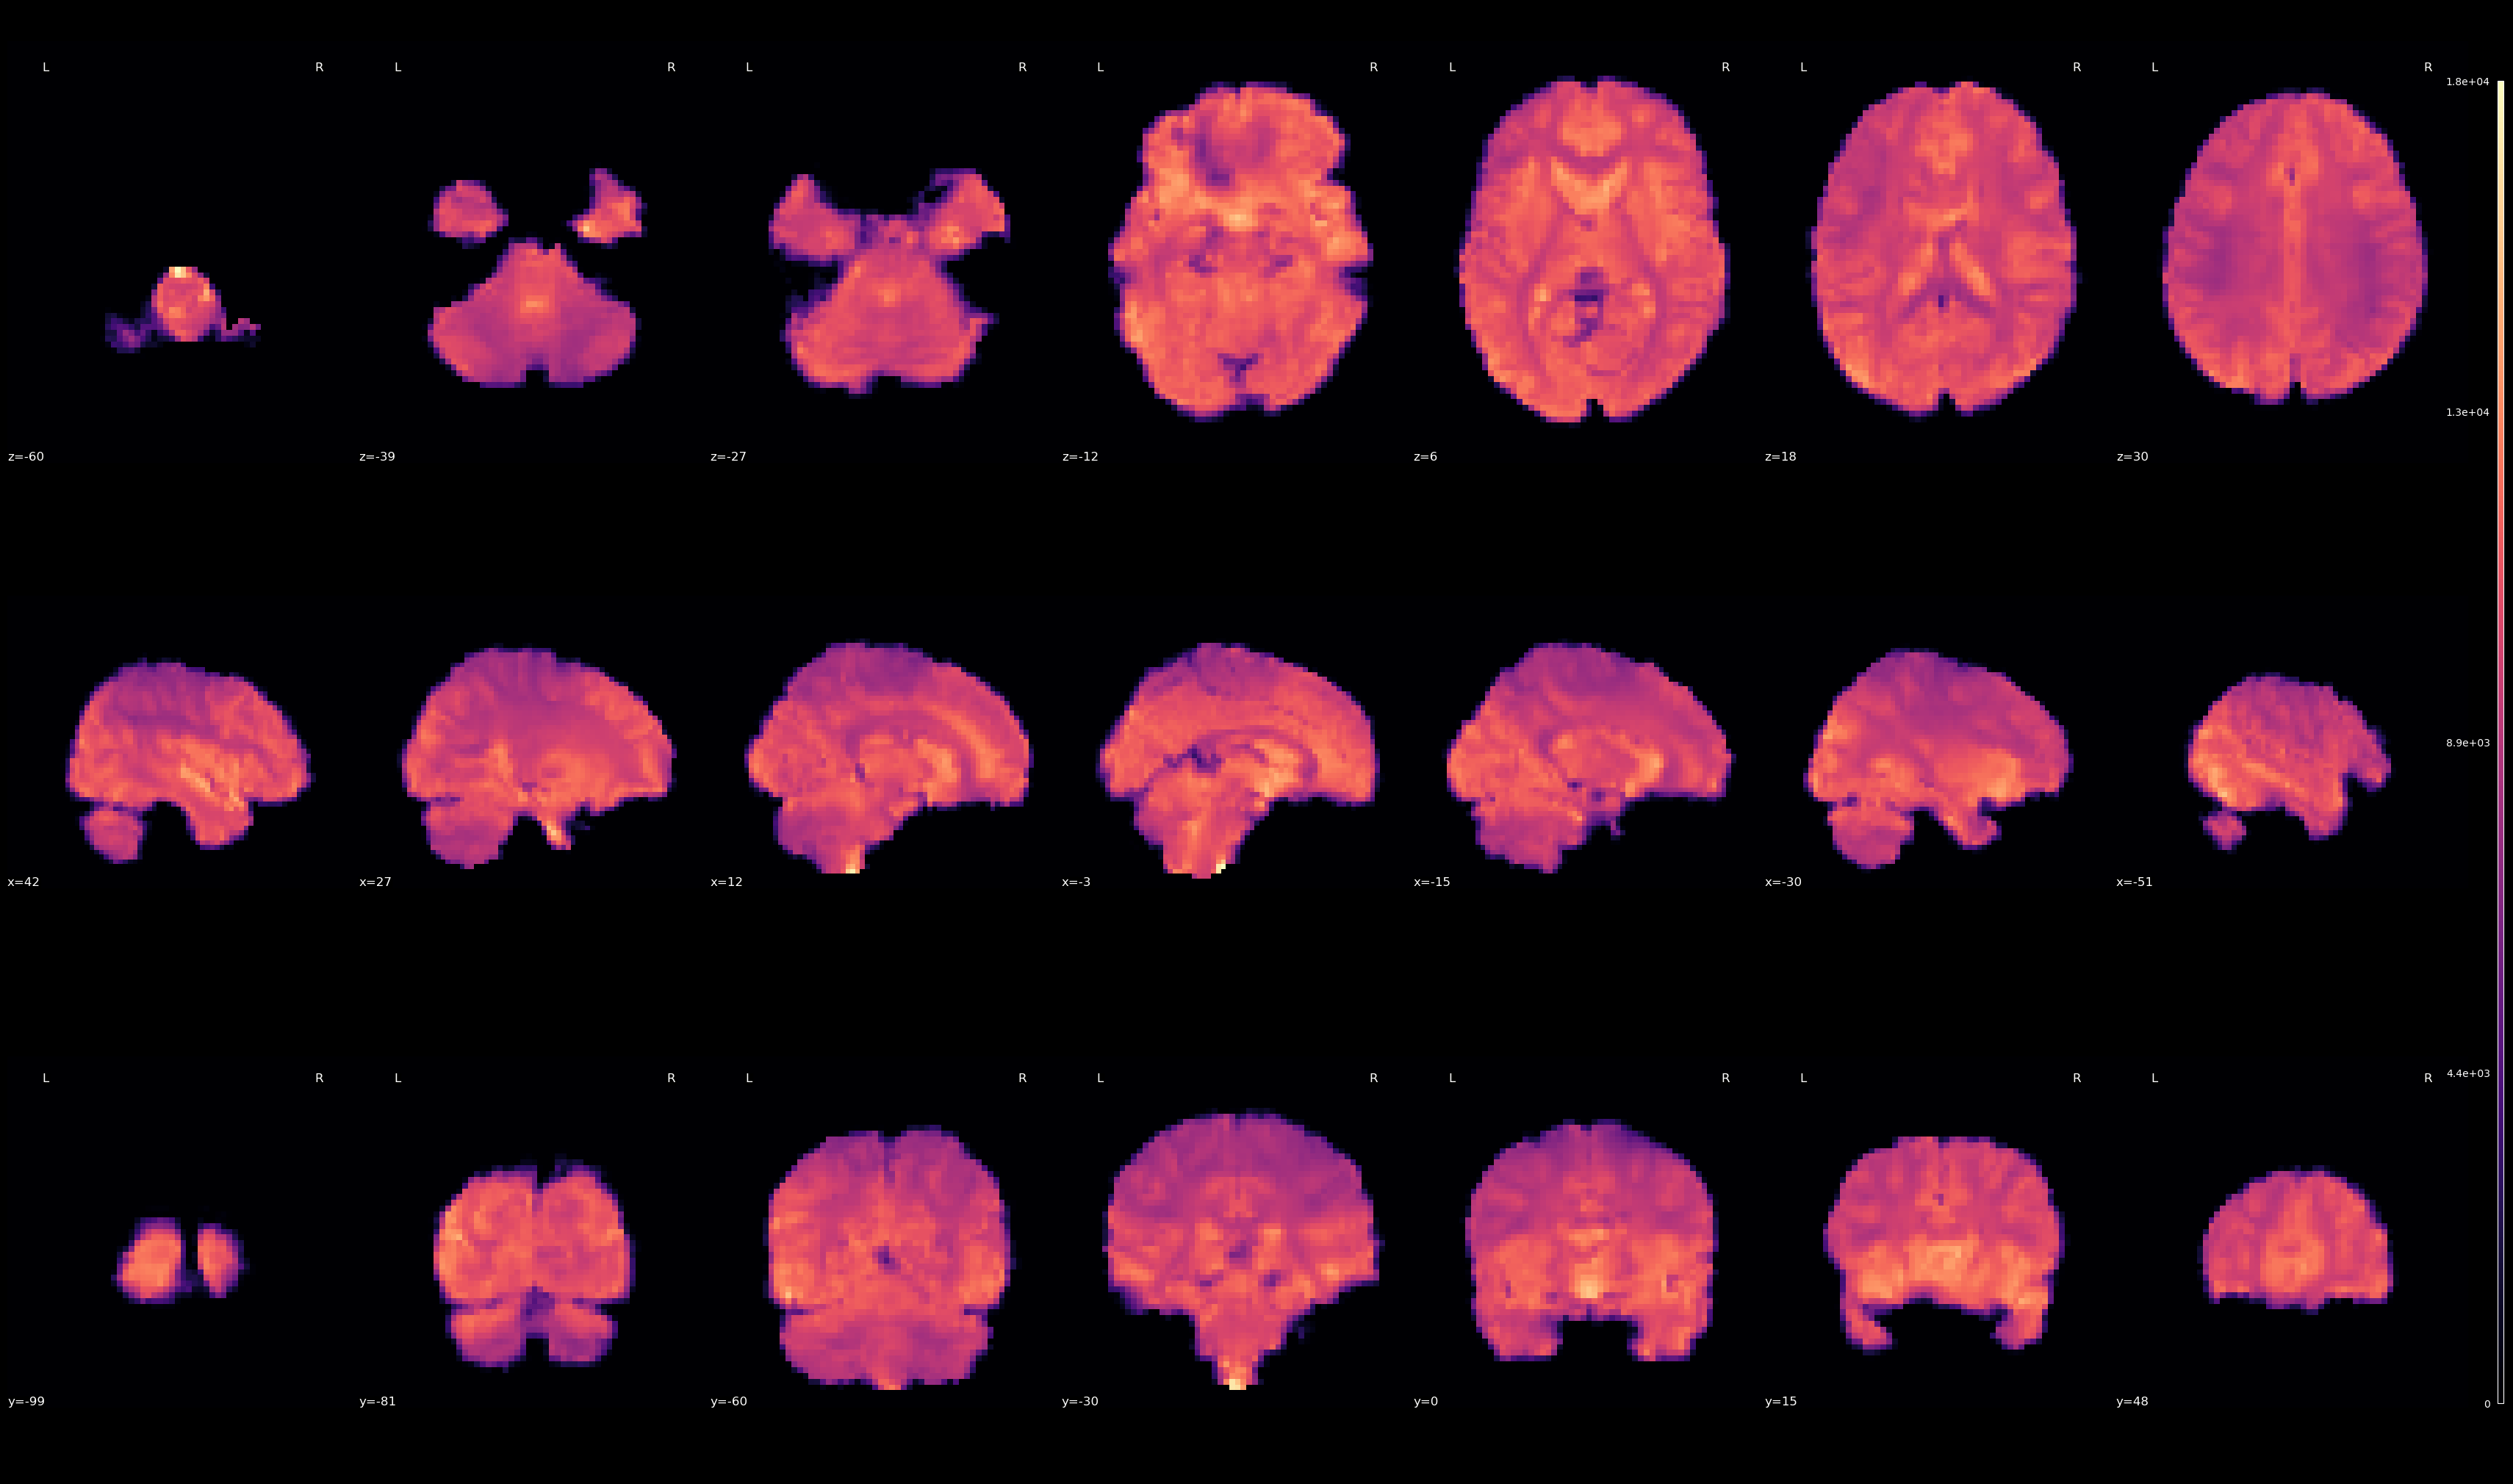

In [10]:
### Generate mosaic plot here
### Note: we also used the plot_epi function instead of plot_anat to generate some colors

plotting.plot_epi(mean_img(adhd_study_sub.func[0]),display_mode="mosaic",colorbar=True,cmap='magma')

### Interactive Plots

One cool feature in Nilearn is the ability to generate interactive plots. These can be generated using the `plotting.view_img(...)` command. Try generating an interactive version of your mean image in the cell below


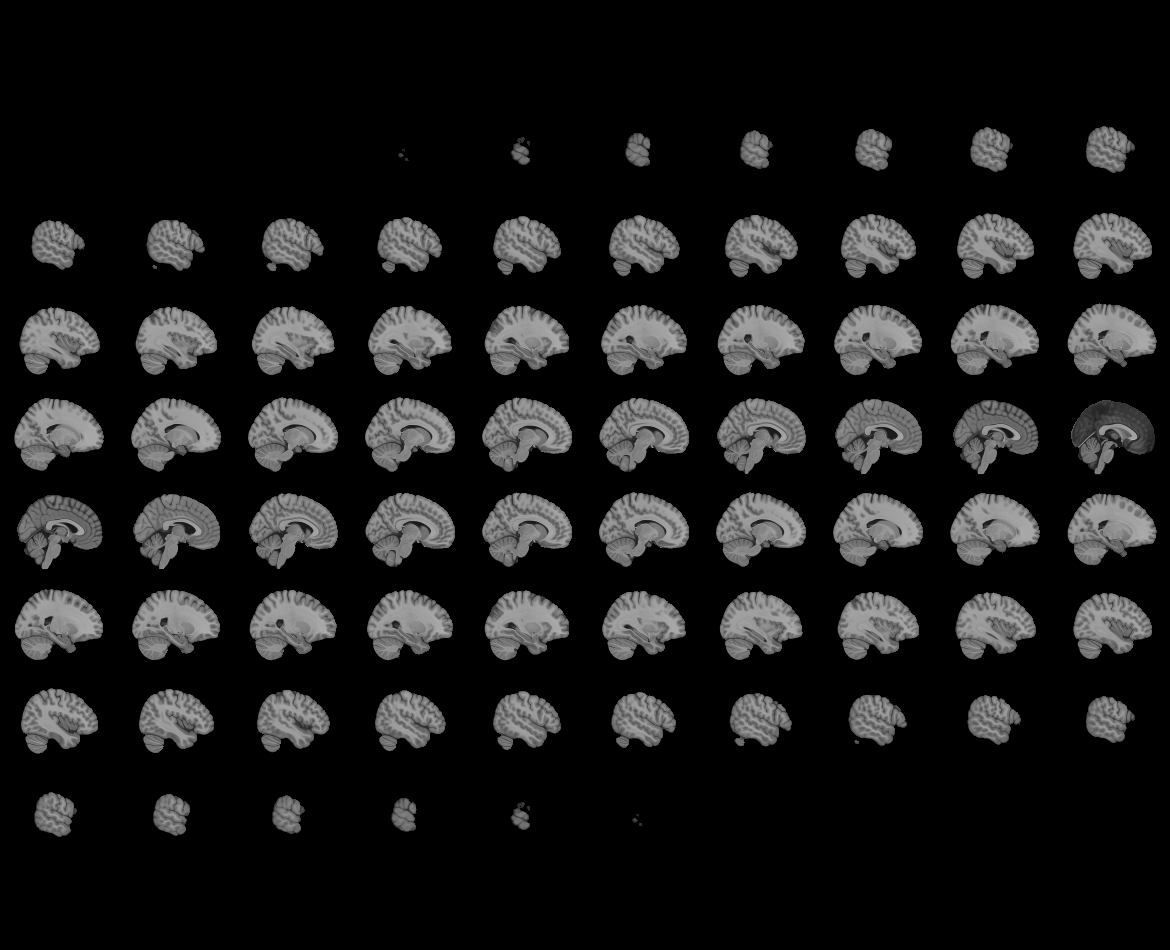
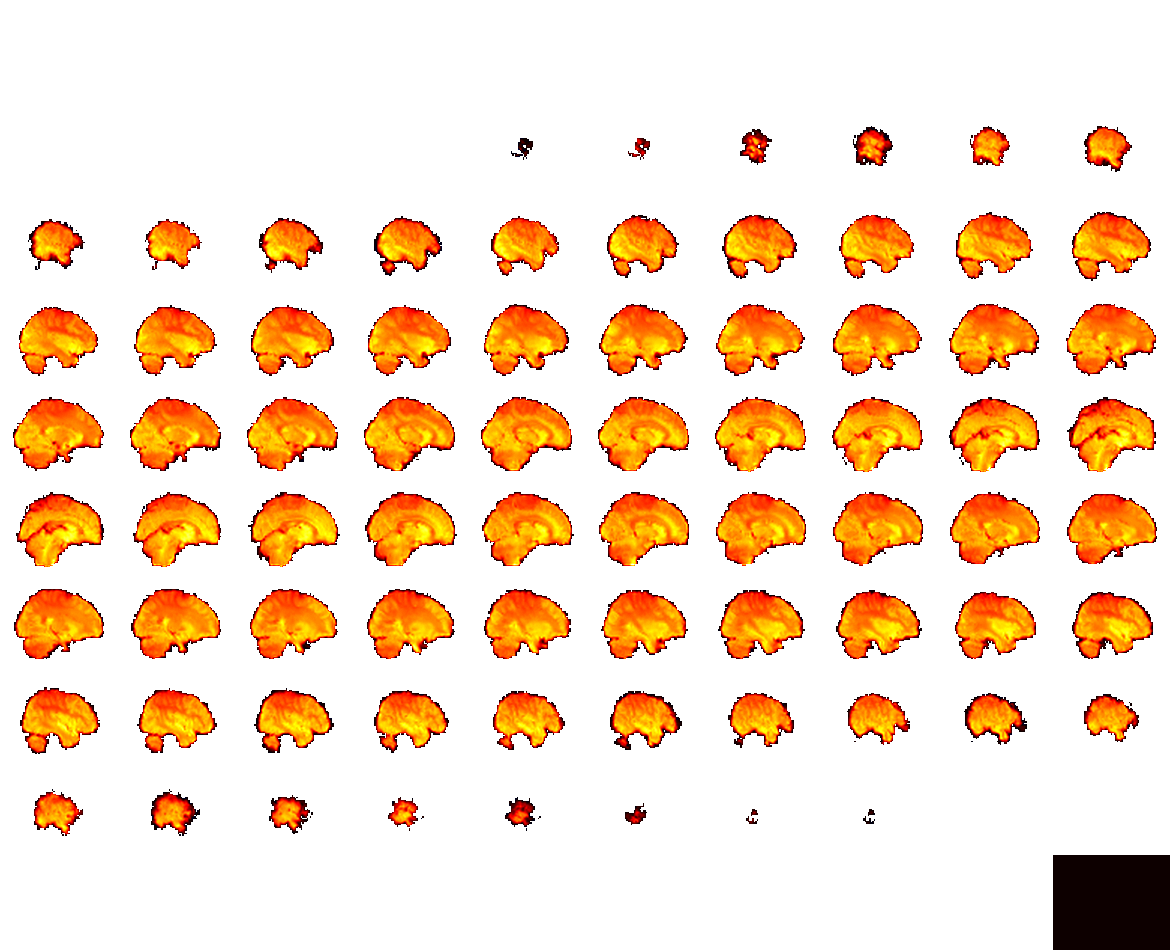

In [11]:
### Generate your interactive plot here

mean_img = mean_img(adhd_study_sub.func[0])

plotting.view_img(mean_img)

## Part 3: Downloading Another Dataset

Now it's your turn to download a dataset. Choose a different preprocessed dataset from nilearn (https://nilearn.github.io/stable/modules/datasets.html), download a single participant's data, and generate the same plots that we just created with the participant from the ADHD dataset. Write your code below and submit the notebook as the first homework assignment

In [ ]:
### Start your code here...